In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy import stats
import copy
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
print(tf.__version__)

2.10.0


In [5]:
data1 = pd.read_excel("C:\\Users\\User\\Desktop\\X_bp.xlsx") #Первая таблица, свойства базальтопластика
data2 = pd.read_excel("C:\\Users\\User\\Desktop\\X_nup.xlsx") #Вторая таблица, свойства углеродопластика

In [ ]:
Просматриваем таблицы, чтобы проанализировать имеющиеся данные

In [222]:
print(data1.columns)

Index(['Unnamed: 0', 'Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
      dtype='object')


In [223]:
print(data1.head(10))

   Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0           0                         1.857143            2030.0   
1           1                         1.857143            2030.0   
2           2                         1.857143            2030.0   
3           3                         1.857143            2030.0   
4           4                         2.771331            2030.0   
5           5                         2.767918            2000.0   
6           6                         2.569620            1910.0   
7           7                         2.561475            1900.0   
8           8                         3.557018            1930.0   
9           9                         3.532338            2100.0   

   модуль упругости, ГПа  Количество отвердителя, м.%  \
0             738.736842                        30.00   
1             738.736842                        50.00   
2             738.736842                        49.90   
3             738.73684

In [224]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            1023 non-null   int64  
 1   Соотношение матрица-наполнитель       1023 non-null   float64
 2   Плотность, кг/м3                      1023 non-null   float64
 3   модуль упругости, ГПа                 1023 non-null   float64
 4   Количество отвердителя, м.%           1023 non-null   float64
 5   Содержание эпоксидных групп,%_2       1023 non-null   float64
 6   Температура вспышки, С_2              1023 non-null   float64
 7   Поверхностная плотность, г/м2         1023 non-null   float64
 8   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 9   Прочность при растяжении, МПа         1023 non-null   float64
 10  Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10), i

In [225]:
print(data2.head(10))

   Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки
0           0                   0          4.0               57.0
1           1                   0          4.0               60.0
2           2                   0          4.0               70.0
3           3                   0          5.0               47.0
4           4                   0          5.0               57.0
5           5                   0          5.0               60.0
6           6                   0          5.0               70.0
7           7                   0          7.0               47.0
8           8                   0          7.0               57.0
9           9                   0          7.0               60.0


In [226]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1040 non-null   int64  
 1   Угол нашивки, град  1040 non-null   int64  
 2   Шаг нашивки         1040 non-null   float64
 3   Плотность нашивки   1040 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 32.6 KB


In [6]:
data1.rename(columns={data1.columns[0]:'id'}, inplace=True)
data2.rename(columns={data2.columns[0]:'id'},inplace=True)
data = pd.merge(data1, data2, how="inner", on="id")
data.drop('id', axis=1, inplace=True)

In [229]:
data.to_excel('C:\\Users\\User\\Desktop\\Data\\merged_file.xlsx', index=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [26]:
data.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [27]:
data.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


In [28]:
# Удаляем из датасета строки, в которых недостаточно данных для обучения.
data.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

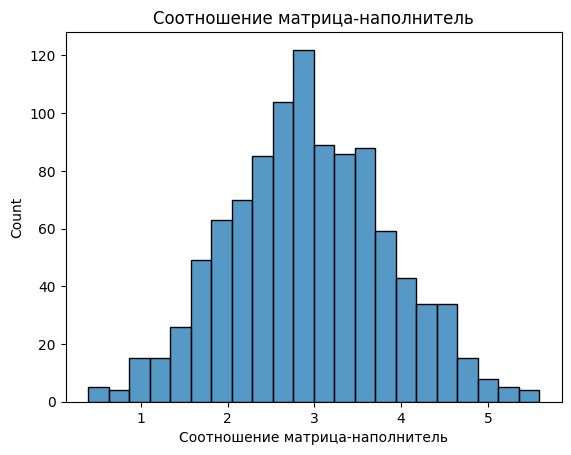

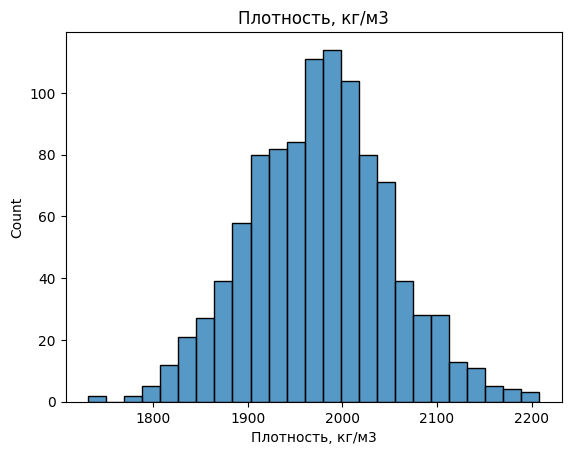

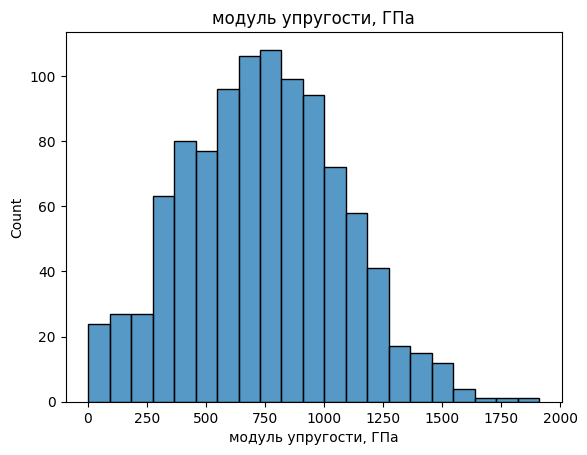

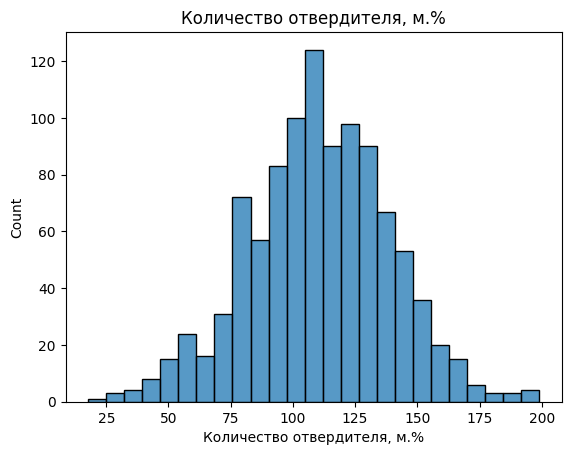

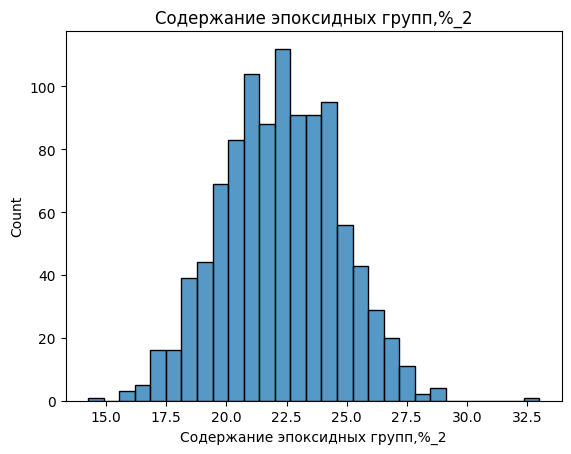

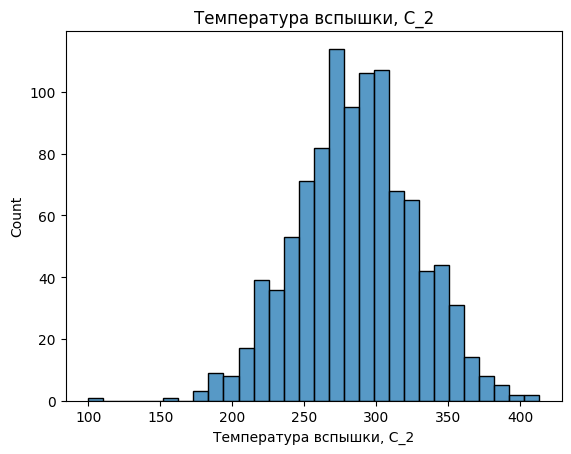

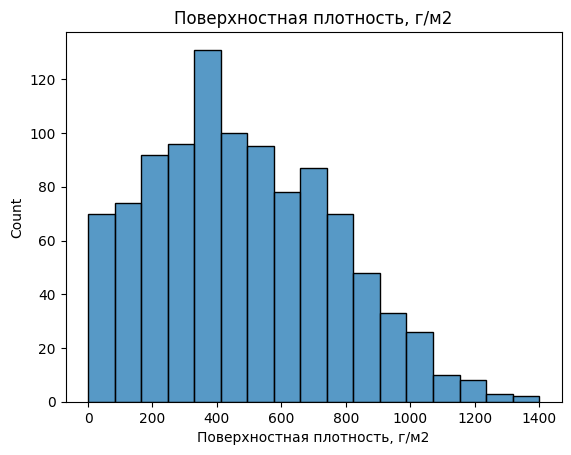

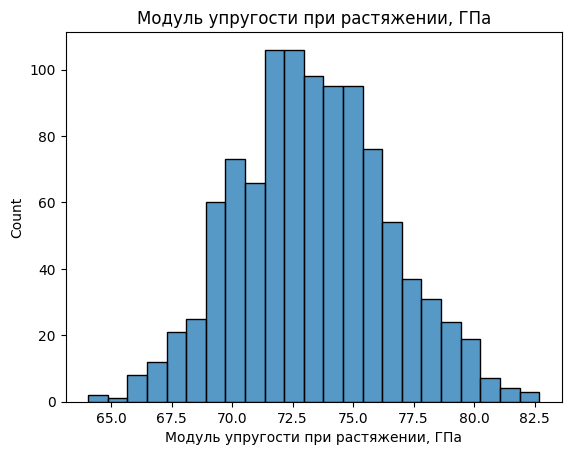

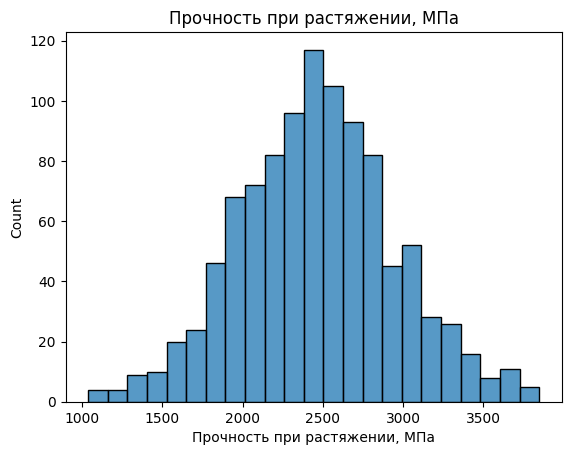

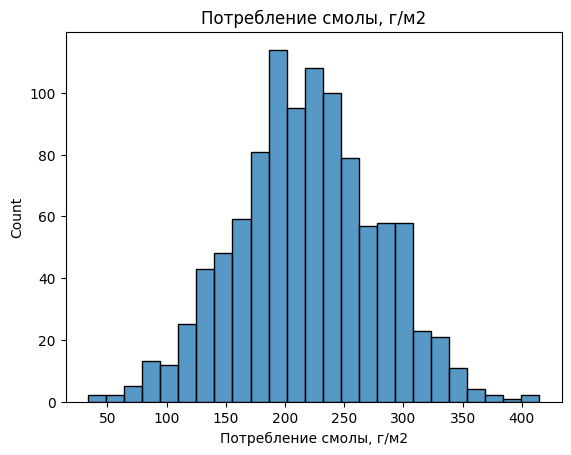

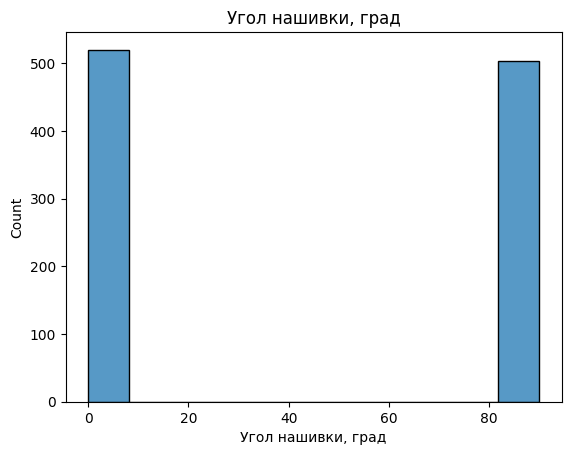

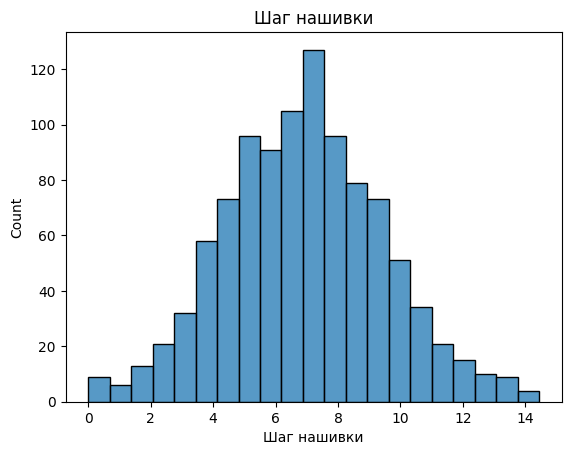

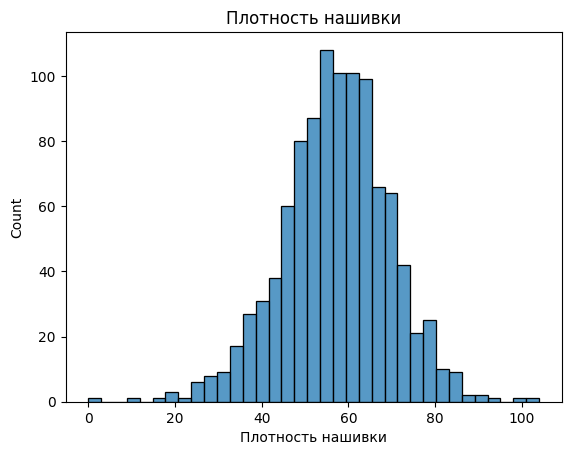

In [29]:
for column in data.columns:
    plt.figure()
    sns.histplot(data[column])
    plt.title(column)


In [30]:
data.corr() #Корреляция между столбцами

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,0.003841,0.031700,-0.006445,0.019766,-0.004776,-0.006272,-0.008411,0.024148,0.072531,-0.031073,0.036437,-0.004652
"Плотность, кг/м3",0.003841,1.000000,-0.009647,-0.035911,-0.008278,-0.020695,0.044930,-0.017602,-0.069981,-0.015937,-0.068474,-0.061015,0.080304
"модуль упругости, ГПа",0.031700,-0.009647,1.000000,0.024049,-0.006804,0.031174,-0.005306,0.023267,0.041868,0.001840,-0.025417,-0.009875,0.056346
"Количество отвердителя, м.%",-0.006445,-0.035911,0.024049,1.000000,-0.000684,0.095193,0.055198,-0.065929,-0.075375,0.007446,0.038570,0.014887,0.017248
"Содержание эпоксидных групп,%_2",0.019766,-0.008278,-0.006804,-0.000684,1.000000,-0.009769,-0.012940,0.056828,-0.023899,0.015165,0.008052,0.003022,-0.039073
"Температура вспышки, С_2",-0.004776,-0.020695,0.031174,0.095193,-0.009769,1.000000,0.020121,0.028414,-0.031763,0.059954,0.020695,0.025795,0.011391
"Поверхностная плотность, г/м2",-0.006272,0.044930,-0.005306,0.055198,-0.012940,0.020121,1.000000,0.036702,-0.003210,0.015692,0.052299,0.038332,-0.049923
"Модуль упругости при растяжении, ГПа",-0.008411,-0.017602,0.023267,-0.065929,0.056828,0.028414,0.036702,1.000000,-0.009009,0.050938,0.023003,-0.029468,0.006476
"Прочность при растяжении, МПа",0.024148,-0.069981,0.041868,-0.075375,-0.023899,-0.031763,-0.003210,-0.009009,1.000000,0.028602,0.023398,-0.059547,0.019604
"Потребление смолы, г/м2",0.072531,-0.015937,0.001840,0.007446,0.015165,0.059954,0.015692,0.050938,0.028602,1.000000,-0.015334,0.013394,0.012239


<Axes: >

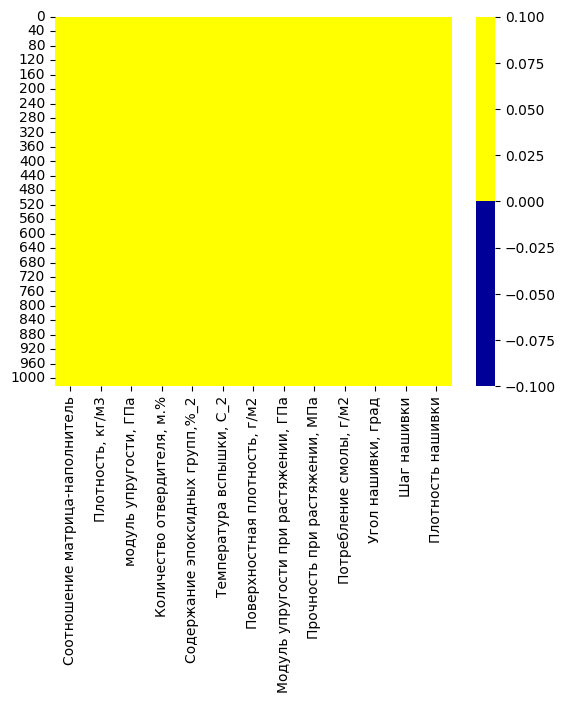

In [31]:
cols = data.columns
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [32]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Соотношение матрица-наполнитель - 0%
Плотность, кг/м3 - 0%
модуль упругости, ГПа - 0%
Количество отвердителя, м.% - 0%
Содержание эпоксидных групп,%_2 - 0%
Температура вспышки, С_2 - 0%
Поверхностная плотность, г/м2 - 0%
Модуль упругости при растяжении, ГПа - 0%
Прочность при растяжении, МПа - 0%
Потребление смолы, г/м2 - 0%
Угол нашивки, град - 0%
Шаг нашивки - 0%
Плотность нашивки - 0%


<Axes: >

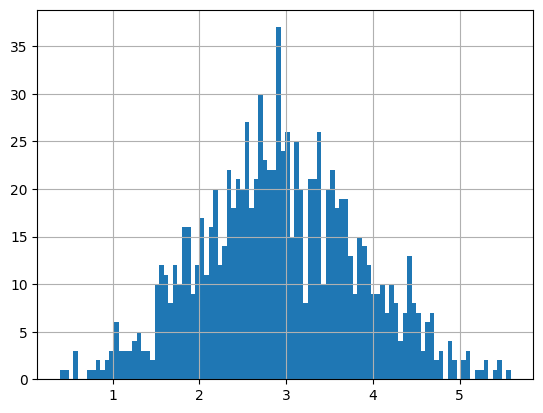

In [33]:
data['Соотношение матрица-наполнитель'].hist(bins=100)

<Axes: >

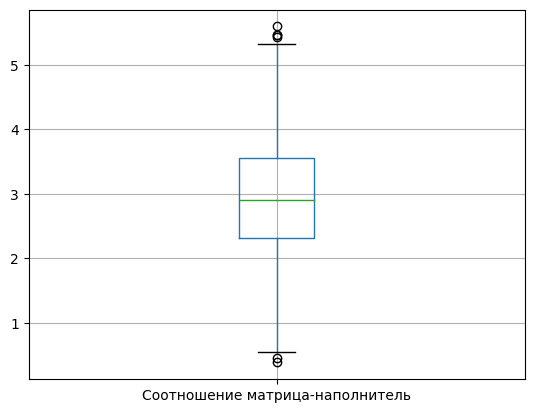

In [34]:
data.boxplot(column=['Соотношение матрица-наполнитель'])

In [35]:
data['Соотношение матрица-наполнитель'].describe()

count    1023.000000
mean        2.930366
std         0.913222
min         0.389403
25%         2.317887
50%         2.906878
75%         3.552660
max         5.591742
Name: Соотношение матрица-наполнитель, dtype: float64

<Axes: >

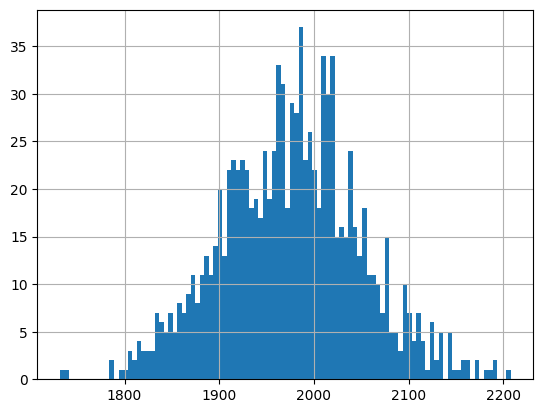

In [36]:
data['Плотность, кг/м3'].hist(bins=100)

<Axes: >

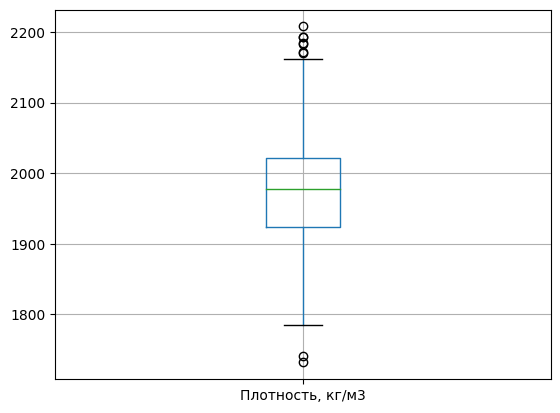

In [37]:
data.boxplot(column=['Плотность, кг/м3'])

In [38]:
data['Плотность, кг/м3'].describe()

count    1023.000000
mean     1975.734888
std        73.729231
min      1731.764635
25%      1924.155467
50%      1977.621657
75%      2021.374375
max      2207.773481
Name: Плотность, кг/м3, dtype: float64

<Axes: >

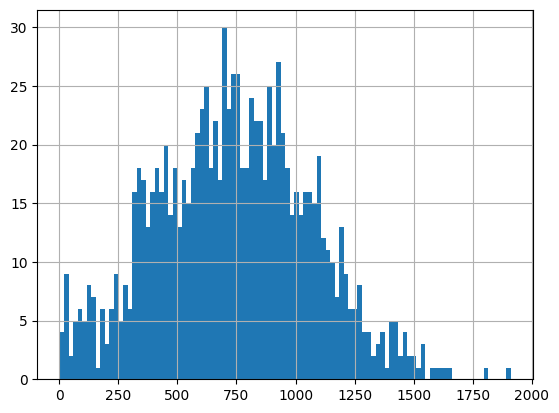

In [39]:
data['модуль упругости, ГПа'].hist(bins=100)

<Axes: >

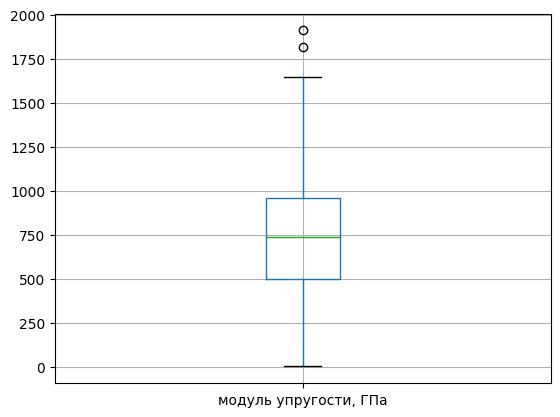

In [40]:
data.boxplot(column=['модуль упругости, ГПа'])

In [41]:
data['модуль упругости, ГПа'].describe()

count    1023.000000
mean      739.923233
std       330.231581
min         2.436909
25%       500.047452
50%       739.664328
75%       961.812526
max      1911.536477
Name: модуль упругости, ГПа, dtype: float64

<Axes: >

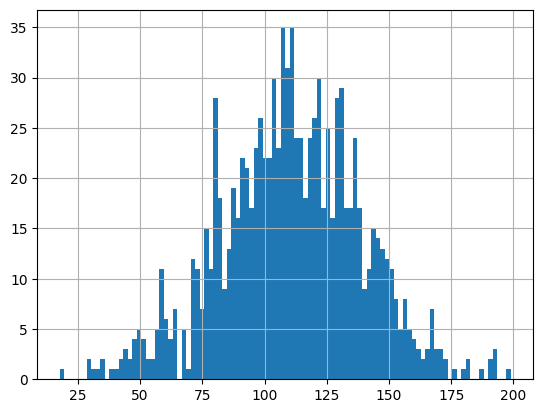

In [42]:
data['Количество отвердителя, м.%'].hist(bins=100)

<Axes: >

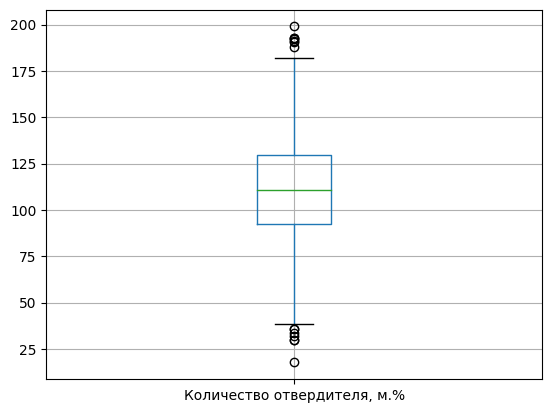

In [43]:
data.boxplot(column=['Количество отвердителя, м.%'])

In [44]:
data['Количество отвердителя, м.%'].describe()

count    1023.000000
mean      110.570769
std        28.295911
min        17.740275
25%        92.443497
50%       110.564840
75%       129.730366
max       198.953207
Name: Количество отвердителя, м.%, dtype: float64

<Axes: >

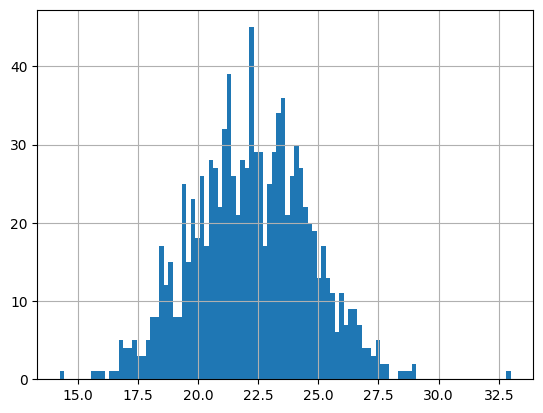

In [45]:
data['Содержание эпоксидных групп,%_2'].hist(bins=100)

<Axes: >

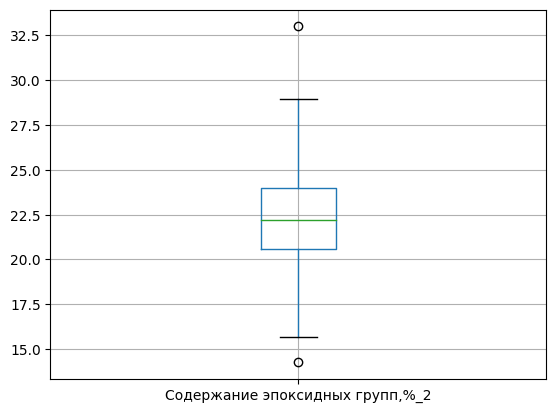

In [46]:
data.boxplot(column=['Содержание эпоксидных групп,%_2'])

In [47]:
data['Содержание эпоксидных групп,%_2'].describe()

count    1023.000000
mean       22.244390
std         2.406301
min        14.254985
25%        20.608034
50%        22.230744
75%        23.961934
max        33.000000
Name: Содержание эпоксидных групп,%_2, dtype: float64

<Axes: >

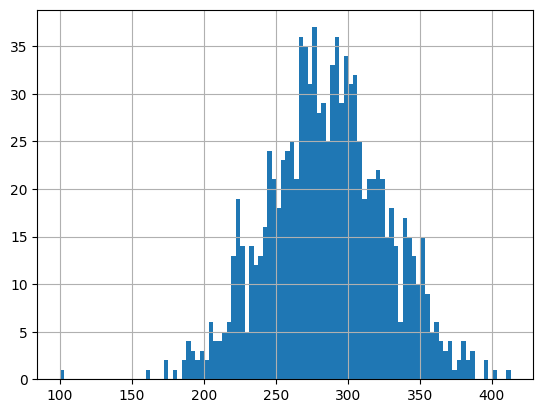

In [48]:
data['Температура вспышки, С_2'].hist(bins=100)

<Axes: >

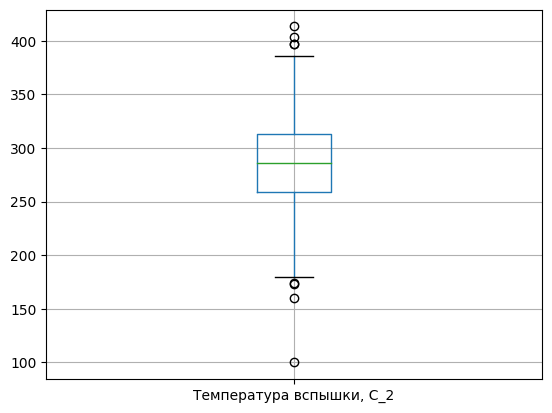

In [49]:
data.boxplot(column=['Температура вспышки, С_2'])

In [50]:
data['Температура вспышки, С_2'].describe()

count    1023.000000
mean      285.882151
std        40.943260
min       100.000000
25%       259.066528
50%       285.896812
75%       313.002106
max       413.273418
Name: Температура вспышки, С_2, dtype: float64

<Axes: >

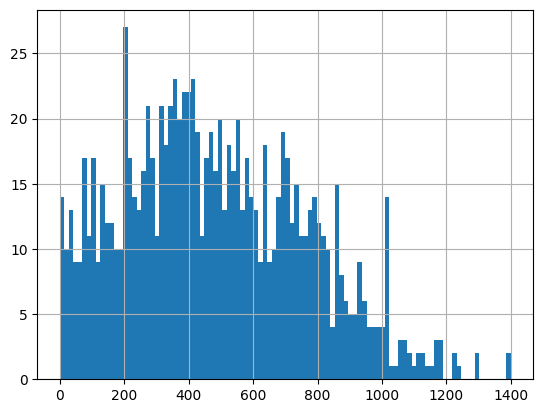

In [51]:
data['Поверхностная плотность, г/м2'].hist(bins=100)

<Axes: >

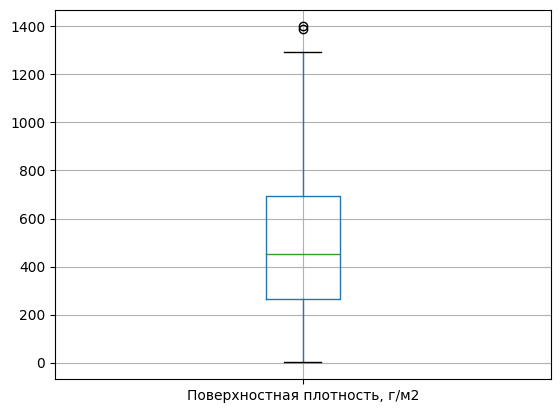

In [52]:
data.boxplot(column=['Поверхностная плотность, г/м2'])

In [53]:
data['Поверхностная плотность, г/м2'].describe()

count    1023.000000
mean      482.731833
std       281.314690
min         0.603740
25%       266.816645
50%       451.864365
75%       693.225017
max      1399.542362
Name: Поверхностная плотность, г/м2, dtype: float64

<Axes: >

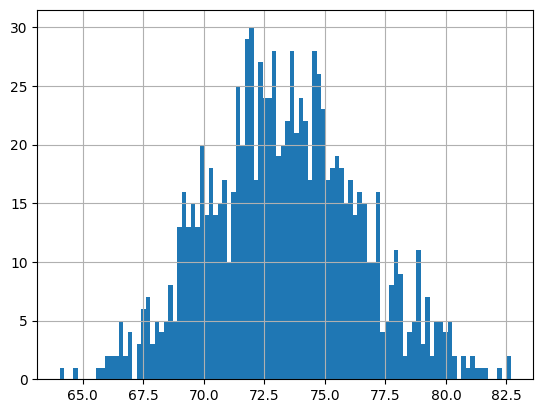

In [54]:
data['Модуль упругости при растяжении, ГПа'].hist(bins=100)

<Axes: >

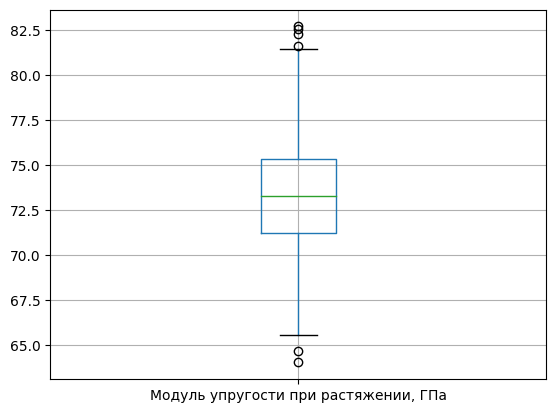

In [55]:
data.boxplot(column=['Модуль упругости при растяжении, ГПа'])

In [56]:
data['Модуль упругости при растяжении, ГПа'].describe()

count    1023.000000
mean       73.328571
std         3.118983
min        64.054061
25%        71.245018
50%        73.268805
75%        75.356612
max        82.682051
Name: Модуль упругости при растяжении, ГПа, dtype: float64

<Axes: >

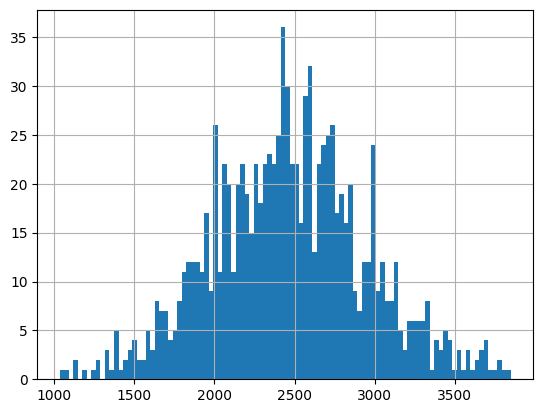

In [57]:
data['Прочность при растяжении, МПа'].hist(bins=100)

<Axes: >

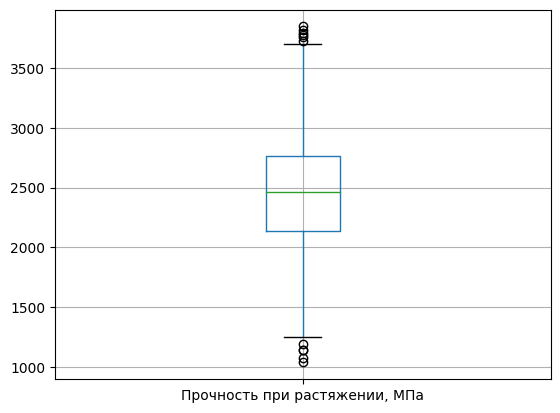

In [58]:
data.boxplot(column=['Прочность при растяжении, МПа'])

In [59]:
data['Прочность при растяжении, МПа'].describe()

count    1023.000000
mean     2466.922843
std       485.628006
min      1036.856605
25%      2135.850448
50%      2459.524526
75%      2767.193119
max      3848.436732
Name: Прочность при растяжении, МПа, dtype: float64

<Axes: >

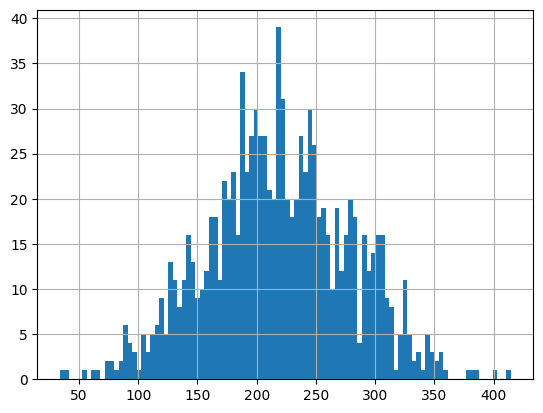

In [60]:
data['Потребление смолы, г/м2'].hist(bins=100)

<Axes: >

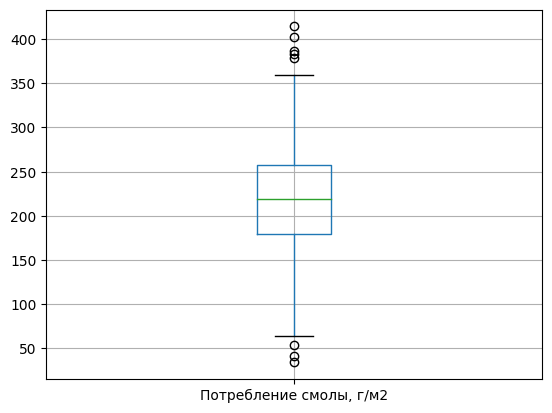

In [61]:
data.boxplot(column=['Потребление смолы, г/м2'])

In [62]:
data['Потребление смолы, г/м2'].describe()

count    1023.000000
mean      218.423144
std        59.735931
min        33.803026
25%       179.627520
50%       219.198882
75%       257.481724
max       414.590628
Name: Потребление смолы, г/м2, dtype: float64

<Axes: >

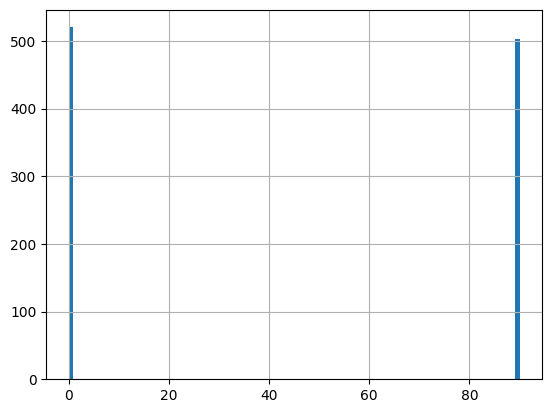

In [63]:
data['Угол нашивки, град'].hist(bins=100)

<Axes: >

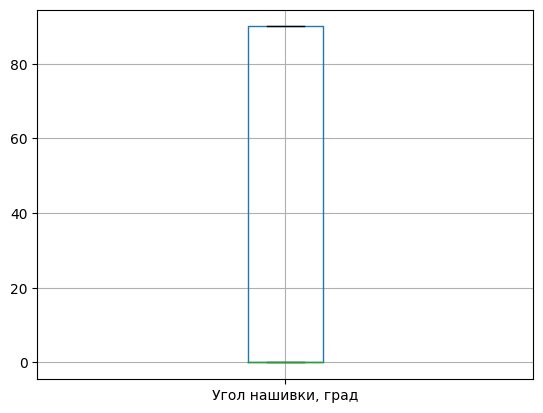

In [64]:
data.boxplot(column=['Угол нашивки, град'])

In [65]:
data['Угол нашивки, град'].describe()

count    1023.000000
mean       44.252199
std        45.015793
min         0.000000
25%         0.000000
50%         0.000000
75%        90.000000
max        90.000000
Name: Угол нашивки, град, dtype: float64

<Axes: >

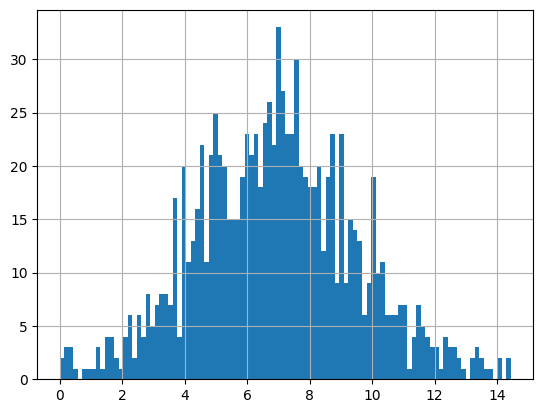

In [66]:
data['Шаг нашивки'].hist(bins=100)

<Axes: >

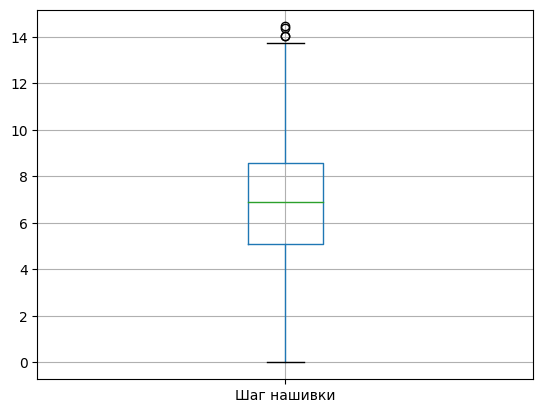

In [67]:
data.boxplot(column=['Шаг нашивки'])

In [68]:
data['Шаг нашивки'].describe()

count    1023.000000
mean        6.899222
std         2.563467
min         0.000000
25%         5.080033
50%         6.916144
75%         8.586293
max        14.440522
Name: Шаг нашивки, dtype: float64

<Axes: >

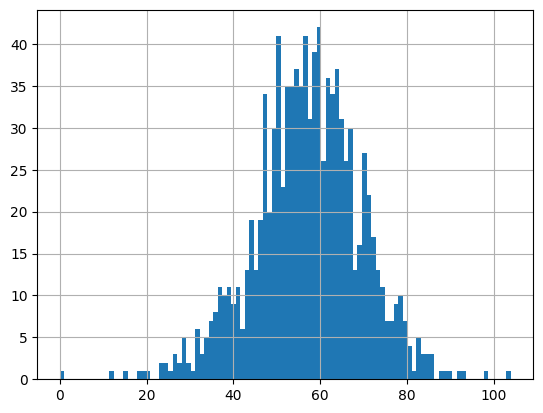

In [69]:
data['Плотность нашивки'].hist(bins=100)

<Axes: >

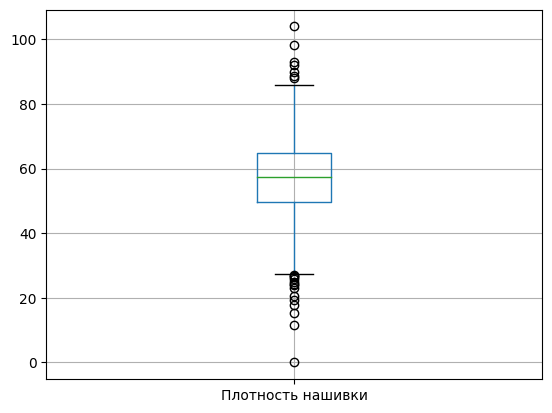

In [70]:
data.boxplot(column=['Плотность нашивки'])

In [71]:
data['Плотность нашивки'].describe()

count    1023.000000
mean       57.153929
std        12.350969
min         0.000000
25%        49.799212
50%        57.341920
75%        64.944961
max       103.988901
Name: Плотность нашивки, dtype: float64

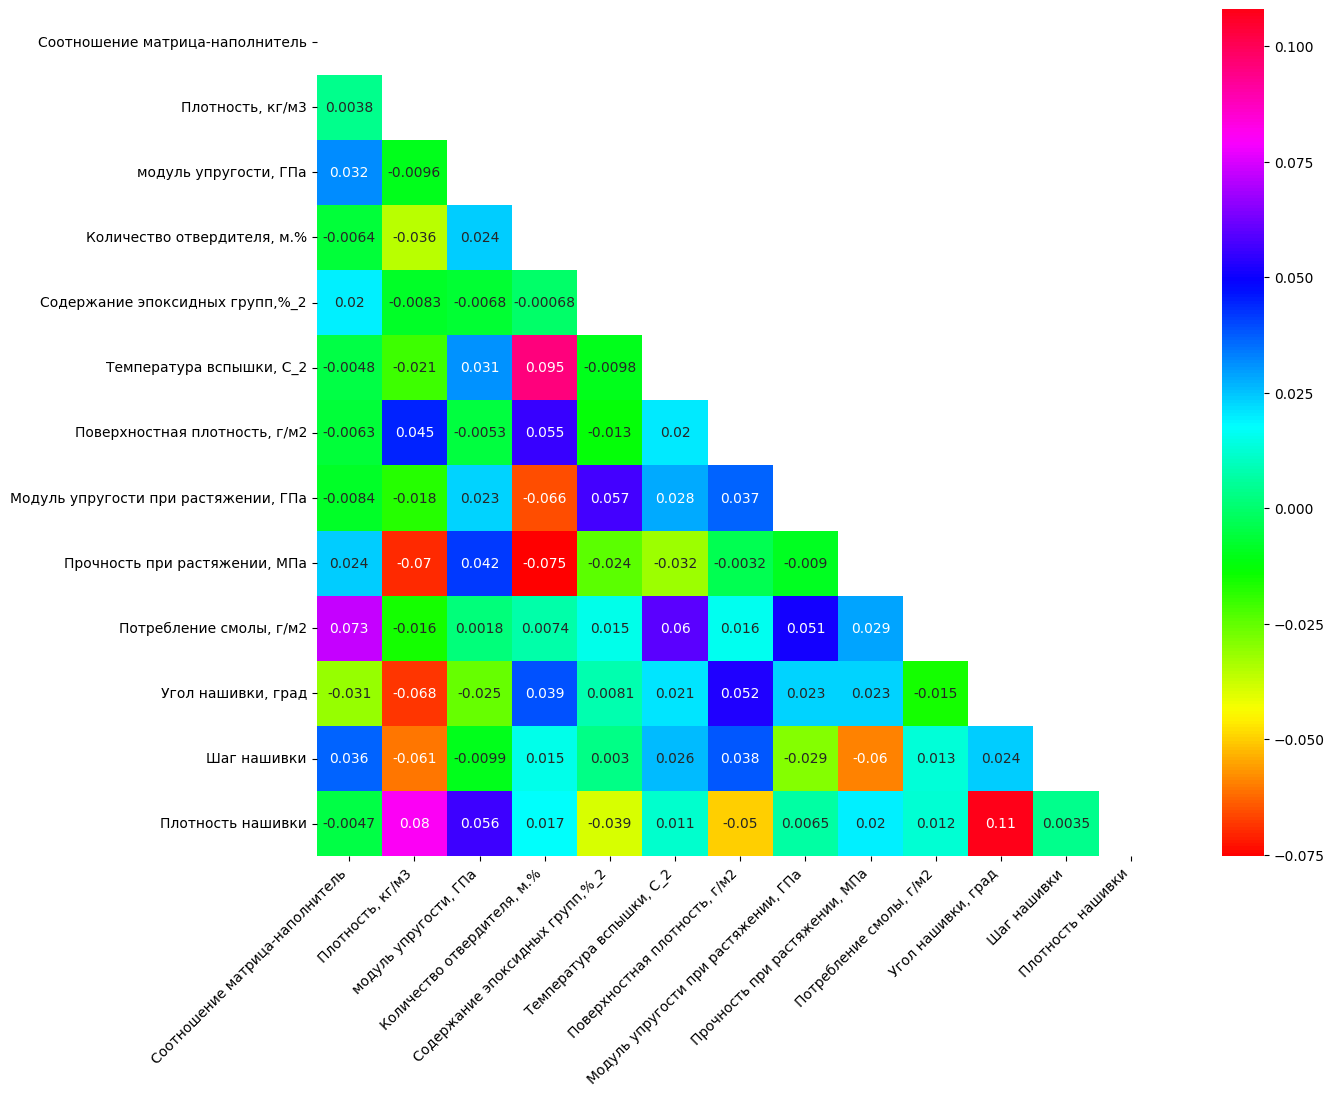

In [72]:
mask = np.triu(data.corr())
f, ax = plt.subplots(figsize=(15, 11))
sns.heatmap(data.corr(), mask=mask, annot=True, square=True, cmap='hsv')
plt.xticks(rotation=45, ha='right')
plt.show()

In [73]:
Q1 = data.quantile(q=.25)
Q3 = data.quantile(q=.75)
IQR = Q3-Q1
max = Q3+(1.5*IQR)
min = Q1-(1.5*IQR)
data_clean = (data < max) | (data > min)
data_clean.shape


(1023, 13)

In [74]:
data_clean.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [ ]:
Нормализация данных

In [76]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
scaler = preprocessing.MinMaxScaler()
columns = data.columns
data_norm = scaler.fit_transform(np.array(data))
data_norm = pd.DataFrame(data_norm, columns=columns)
data_norm.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.282131,0.626533,0.385679,0.067654,0.427467,0.000000,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.548135
1,0.282131,0.626533,0.385679,0.178021,0.506535,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.576985
2,0.282131,0.626533,0.385679,0.177469,1.000000,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.673149
3,0.282131,0.626533,0.385679,0.613972,0.373167,0.638420,0.149682,0.319194,0.698235,0.488979,0.0,0.346248,0.451971
4,0.457857,0.626533,0.393150,0.519387,0.427467,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.346248,0.548135


In [ ]:
Построение модели

In [78]:
model = RandomForestRegressor(n_estimators=100, random_state=0)

In [79]:
x_m = data.drop(['Модуль упругости при растяжении, ГПа'], axis=1) # m-модуль упругости, p-прочность
x_p = data.drop(['Прочность при растяжении, МПа'], axis=1)
y_m = data[['Модуль упругости при растяжении, ГПа']]
y_p = data[['Прочность при растяжении, МПа']]

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(x_m, y_m, test_size=0.3, random_state=11)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(x_p, y_p, test_size=0.3, random_state=11)

In [80]:
print ('Training Set_1: %d rows\nTest Set_1    : %d rows' % (X_train_m.shape[0], X_test_m.shape[0]))

Training Set_1: 716 rows
Test Set_1    : 307 rows


In [81]:
print ('Training Set_2: %d rows\nTest Set_2    : %d rows' % (X_train_p.shape[0], X_test_p.shape[0]))

Training Set_2: 716 rows
Test Set_2    : 307 rows


In [82]:
data_st = (data-data.mean ())/data.std()

#view new data frame
data_st

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,-1.175205,0.736005,-0.003593,-2.847435,0.009753,-4.539994,-0.969490,-1.067198,1.097707,0.026397,-0.983037,-1.130977,-0.012463
1,-1.175205,0.736005,-0.003593,-2.140619,0.625695,-0.030940,-0.969490,-1.067198,1.097707,0.026397,-0.983037,-1.130977,0.230433
2,-1.175205,0.736005,-0.003593,-2.144153,4.469769,-0.030940,-0.969490,-1.067198,1.097707,0.026397,-0.983037,-1.130977,1.040086
3,-1.175205,0.736005,-0.003593,0.651304,-0.413244,0.344815,-0.969490,-1.067198,1.097707,0.026397,-0.983037,-0.740880,-0.822116
4,-0.174147,0.736005,0.039599,0.045562,0.009753,-0.030940,-0.969490,-1.067198,1.097707,0.026397,-0.983037,-0.740880,-0.012463
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,-0.721642,-0.320727,0.523670,-0.833286,-0.881494,0.949910,-0.972339,-0.076182,-0.163974,-1.563807,1.016261,0.849302,-0.820515
1019,0.562466,1.008478,-0.893890,1.251460,-1.099040,-0.773430,-0.469478,-0.130730,-0.219366,-1.685636,1.016261,1.430247,-0.275536
1020,0.383520,-0.045600,-0.978364,-0.001318,0.711927,-0.914903,0.915028,0.450715,0.403567,0.304400,1.016261,-1.068111,0.848173
1021,0.848627,1.235126,0.004701,1.089458,-1.245665,-0.246739,0.564266,0.228965,-0.813806,-0.356520,1.016261,-0.228605,0.089640


In [83]:
data_st. std()

Соотношение матрица-наполнитель         1.0
Плотность, кг/м3                        1.0
модуль упругости, ГПа                   1.0
Количество отвердителя, м.%             1.0
Содержание эпоксидных групп,%_2         1.0
Температура вспышки, С_2                1.0
Поверхностная плотность, г/м2           1.0
Модуль упругости при растяжении, ГПа    1.0
Прочность при растяжении, МПа           1.0
Потребление смолы, г/м2                 1.0
Угол нашивки, град                      1.0
Шаг нашивки                             1.0
Плотность нашивки                       1.0
dtype: float64

In [84]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [85]:
for col in data.columns:
    print(f'{col} range :', round(np.min(data[col]),2), "-", round(np.max(data[col]),2))

Соотношение матрица-наполнитель range : 0.39 - 5.59
Плотность, кг/м3 range : 1731.76 - 2207.77
модуль упругости, ГПа range : 2.44 - 1911.54
Количество отвердителя, м.% range : 17.74 - 198.95
Содержание эпоксидных групп,%_2 range : 14.25 - 33.0
Температура вспышки, С_2 range : 100.0 - 413.27
Поверхностная плотность, г/м2 range : 0.6 - 1399.54
Модуль упругости при растяжении, ГПа range : 64.05 - 82.68
Прочность при растяжении, МПа range : 1036.86 - 3848.44
Потребление смолы, г/м2 range : 33.8 - 414.59
Угол нашивки, град range : 0 - 90
Шаг нашивки range : 0.0 - 14.44
Плотность нашивки range : 0.0 - 103.99


In [86]:
scaler = StandardScaler()
scaler.fit(X_train_m)
X_train_m_scaled = scaler.transform(X_train_m) 
X_test_m_scaled = scaler.transform(X_test_m)

In [87]:
X_train_m_scaled[1]

array([ 0.39692183,  1.40978865,  1.08820211, -1.87296615, -1.37349008,
        0.29921785, -0.99949413,  0.95025201,  0.94155254,  1.01123631,
       -0.37189603,  1.58036731])

In [88]:
X_test_m_scaled[1]

array([ 1.25382637, -0.0967914 ,  0.04060058, -1.79441497, -1.68770297,
       -0.41711116,  0.08996783, -1.08545192, -0.70339013,  1.01123631,
        0.29050213,  0.34236312])

In [89]:
y_test_m.shape

(307, 1)

In [90]:
scaler = StandardScaler()
scaler.fit(X_train_p)
X_train_p_scaled = scaler.transform(X_train_p) 
X_test_p_scaled = scaler.transform(X_test_p)

In [91]:
X_test_p_scaled[1]

array([ 1.25382637, -0.0967914 ,  0.04060058, -1.79441497, -1.68770297,
       -0.41711116,  0.08996783, -2.12068088, -0.70339013,  1.01123631,
        0.29050213,  0.34236312])

In [92]:
y_test_p.shape

(307, 1)

In [93]:
def train_val_m(y_train_m, y_train_m_pred, y_test_m, y_pred_m, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train_m, y_train_m_pred),
    "mae" : mean_absolute_error(y_train_m, y_train_m_pred),
    "mse" : mean_squared_error(y_train_m, y_train_m_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train_m, y_train_m_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test_m, y_pred_m),
    "mae" : mean_absolute_error(y_test_m, y_pred_m),
    "mse" : mean_squared_error(y_test_m, y_pred_m),
    "rmse" : np.sqrt(mean_squared_error(y_test_m, y_pred_m))}}
    
    return pd.DataFrame(scores)

In [94]:
type(y_test_m)

pandas.core.frame.DataFrame

In [95]:
def train_val_p(y_train_p, y_train_p_pred, y_test_p, y_pred_p, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train_p, y_train_p_pred),
    "mae" : mean_absolute_error(y_train_p, y_train_p_pred),
    "mse" : mean_squared_error(y_train_p, y_train_p_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train_p, y_train_p_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test_p, y_pred_p),
    "mae" : mean_absolute_error(y_test_p, y_pred_p),
    "mse" : mean_squared_error(y_test_p, y_pred_p),
    "rmse" : np.sqrt(mean_squared_error(y_test_p, y_pred_p))}}
    
    return pd.DataFrame(scores)


In [96]:
type(y_test_p)

pandas.core.frame.DataFrame

In [97]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Для Модуля упругости при растяжении
# Обучение модели на тренировочных данных
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_m, y_train_m)

# Прогнозирование значений на тестовых данных
y_pred_m = knn.predict(X_test_m)

# Оценка качества модели
mse = mean_squared_error(y_test_m, y_pred_m)
mae = mean_absolute_error(y_test_m, y_pred_m)
r2 = r2_score(y_test_m, y_pred_m)

print('MSE:', mse)
print('MAE:', mae)
print('R2:', r2)

MSE: 11.325725339626828
MAE: 2.6425427281159037
R2: -0.09676558727319451


LinearRegression() 

      linear_train  linear_test
R2        0.022804    -0.024359
mae       2.414220     2.651981
mse       9.221224    10.578025
rmse      3.036647     3.252388


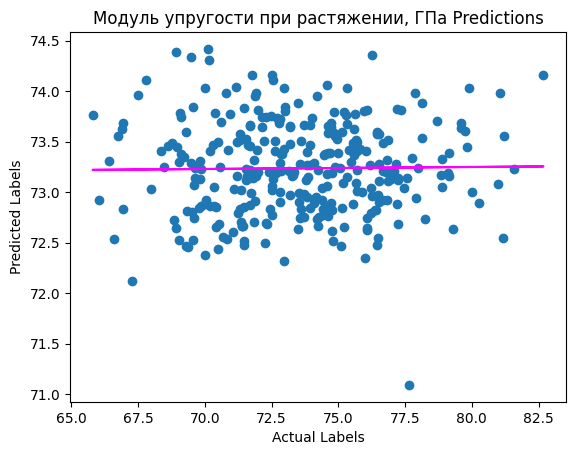

In [98]:
linear = LinearRegression().fit(X_train_m_scaled, y_train_m) # Обучение На тренировочном наборе
print (linear, "\n")

#Оценка модели с использованием тестовых данных. Обученная модель запускается на X_test и извлекается метрика

y_pred_m = linear.predict(X_test_m_scaled)
y_train_m_pred = linear.predict(X_train_m_scaled)
ls =train_val_m(y_train_m, y_train_m_pred, y_test_m, y_pred_m, "linear")
print(ls)

#Сравнение предсказанного результата с фактическим
plt.scatter(y_test_m, y_pred_m)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Модуль упругости при растяжении, ГПа Predictions')

#Линия регресии
z = np.polyfit(y_test_m.to_numpy().ravel(), pd.DataFrame(y_pred_m).values.ravel(), 1)
p = np.poly1d(z)
plt.plot(y_test_m,p(y_test_m), color='magenta')
plt.show()

y_pred_1 = linear.predict(X_test_m_scaled)
linear_R2 = r2_score(y_test_m, y_pred_m)
linear_mae = mean_absolute_error(y_test_m, y_pred_m)
linear_mse = mean_squared_error(y_test_m, y_pred_m)
linear_rmse = np.sqrt(mean_squared_error(y_test_m, y_pred_m))


In [99]:
def adj_r2(y_test_m, y_pred_m, X_m):
    r2 = r2_score(y_test_m, y_pred_m)
    n = X_m.shape[0]   # Число наблюдений
    p = X_m.shape[1]   #Число независимых переменных
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2
     

In [100]:
adj_r2(y_test_m, y_pred_m, X_test_m)

-0.0661700647068233

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Создание объекта StandardScaler
scaler = StandardScaler()

#одномерный массив
y_train_m = y_train_m.values.ravel()
y_test_m = y_test_m.values.ravel()

# Нормализация данных
X_train_m_scaled = scaler.fit_transform(X_train_m)
X_test_m_scaled = scaler.transform(X_test_m)


# Создание модели
rf_m = RandomForestRegressor()

# Создание сетки параметров для перебора
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Создание объекта GridSearchCV
grid = GridSearchCV(rf_m, param_grid, cv=5, n_jobs=-1)

# Обучение модели на тренировочных данных
grid.fit(X_train_m_scaled, y_train_m)

# Вывод наилучших параметров и оценки качества модели
rf_m_best = grid.best_estimator_
print(f'R2-score случайного леса: {rf_m_best.score(X_test_m_scaled, y_test_m).round(3)}')

R2-score случайного леса: -0.019


In [102]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Создание модели
sgd_m = SGDRegressor()

# Создание сетки параметров для перебора
param_grid = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate' : ['optimal', 'invscaling', 'adaptive'],
    'tol': [0.001, 0.0001, 0.00001]
}

# Создание объекта GridSearchCV
grid = GridSearchCV(sgd_m, param_grid, cv=5, n_jobs=-1)

# Обучение модели на тренировочных данных
grid.fit(X_train_m, y_train_m.ravel())

# Вывод наилучших параметров и оценки качества модели

sgd_m = grid.best_estimator_
print(f'R2-score SGD для модуля упругости при растяжении: {sgd_m.score(X_test_m, y_test_m).round(3)}')
print(mean_absolute_error(y_test_m, sgd_m.predict(X_test_m)))


R2-score SGD для модуля упругости при растяжении: -0.706
3.354865294329838


In [103]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_p, y_train_p)

# Прогнозирование значений на тестовых данных
y_pred_p = knn.predict(X_test_p)

# Оценка качества модели
mse = mean_squared_error(y_test_p, y_pred_p)
mae = mean_absolute_error(y_test_p, y_pred_p)
r2 = r2_score(y_test_p, y_pred_p)

print('MSE:', mse)
print('MAE:', mae)
print('R2:', r2)


MSE: 266330.7257556867
MAE: 410.8312678128908
R2: -0.1732038454176501


In [104]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

# Создание модели
sgd_p = SGDRegressor()

# Создание сетки параметров для перебора
param_grid = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate' : ['optimal', 'invscaling', 'adaptive'],
    'tol': [0.001, 0.0001, 0.00001]
}

# Создание объекта GridSearchCV
grid = GridSearchCV(sgd_p, param_grid, cv=5, n_jobs=-1)

# Обучение модели на тренировочных данных
grid.fit(X_train_p, y_train_p.values.ravel())

# Вывод наилучших параметров и оценки качества модели

sgd_p = grid.best_estimator_
print(f'R2-score SGD для модуля прочность при растяжении: {sgd_p.score(X_test_p, y_test_p).round(3)}')
print(mean_absolute_error(y_test_p, sgd_p.predict(X_test_p)))

R2-score SGD для модуля прочность при растяжении: -0.089
388.5814304775236


In [107]:
scaler = StandardScaler()

y_train_p = y_train_p.values.ravel()
y_test_p = y_test_p.values.ravel()

# Нормализация данных
X_train_p_scaled = scaler.fit_transform(X_train_p)
X_test_p_scaled = scaler.transform(X_test_p)

rf_p = RandomForestRegressor()

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(rf_p, param_grid, cv=5, n_jobs=-1)

grid.fit(X_train_p_scaled, y_train_p)

# Вывод наилучших параметров и оценки качества модели
rf_p_best = grid.best_estimator_
print(f'R2-score случайного леса: {rf_p_best.score(X_test_p_scaled, y_test_p).round(3)}')

R2-score случайного леса: -0.028


LinearRegression() 

       linear_train    linear_test
R2         0.028946      -0.026824
mae      385.274005     369.736506
mse   232361.827896  233100.717966
rmse     482.039239     482.805052


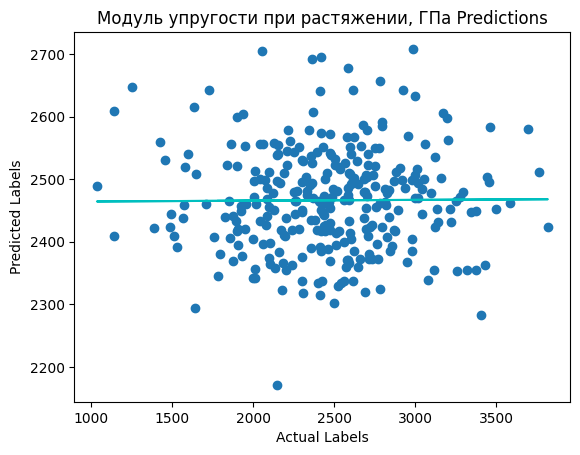

In [108]:

# Fit Linear model on the training set. The model is trained on x_train and y_train.
linear = LinearRegression().fit(X_train_p_scaled, y_train_p)
print (linear, "\n")

# Evaluate the model using the test data. The trained model is run on X_test and metrics are retrieved.
y_pred_p = linear.predict(X_test_p_scaled)
y_train_p_pred = linear.predict(X_train_p_scaled)
ls = train_val_p(y_train_p, y_train_p_pred, y_test_p, y_pred_p, "linear")
print(ls)

# Plot predicted vs actual
plt.scatter(y_test_p, y_pred_p)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Модуль упругости при растяжении, ГПа Predictions')

# Overlay the regression line
z = np.polyfit(y_test_p.ravel(), pd.DataFrame(y_pred_p).values.ravel(), 1)
p = np.poly1d(z)
plt.plot(y_test_p,p(y_test_p), color='c')
plt.show()

y_pred_p = linear.predict(X_test_p_scaled)
linear_R2 = r2_score(y_test_p, y_pred_p)
linear_mae = mean_absolute_error(y_test_p, y_pred_p)
linear_mse = mean_squared_error(y_test_p, y_pred_p)
linear_rmse = np.sqrt(mean_squared_error(y_test_p, y_pred_p))


In [109]:
def adj_r2(y_test_p, y_pred_p, X_p):
    r2 = r2_score(y_test_p, y_pred_p)
    n = X_p.shape[0]   
    p = X_p.shape[1]  
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [110]:
adj_r2(y_test_p, y_pred_p, X_test_p)

-0.06873470511837732

In [ ]:
Нейросеть для рекомендации соотношения матица-наполнитель

In [167]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler

In [168]:
X = data.drop(['Соотношение матрица-наполнитель'], axis=1)
y = data[['Соотношение матрица-наполнитель']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [169]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [181]:
model = Sequential()
model.add(Dense(64, activation='tanh', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [182]:
learning_rate = 0.01
momentum = 0
nesterov = True

In [183]:
optimizer = SGD(learning_rate=learning_rate, momentum=momentum, nesterov=nesterov)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [184]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=50, validation_split=0.2)

# Оценка качества модели на тестовых данных
mse, mae = model.evaluate(X_test_scaled, y_test)
print(f"Mean Squared Error on test set: {mse:.3f}")
print(f"Mean Absolute Error on test set: {mae:.3f}")

# Делаем предсказание
y_pred = model.predict(X_test)

# Считаем статистику
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Выводим статистику
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Epoch 1/100
12/12 [==============================] - 2s 60ms/step - loss: 6.5568 - mae: 2.3921 - val_loss: 5.9071 - val_mae: 2.2494
Epoch 2/100
12/12 [==============================] - 0s 14ms/step - loss: 6.0352 - mae: 2.2811 - val_loss: 5.4695 - val_mae: 2.1550
Epoch 3/100
12/12 [==============================] - 0s 13ms/step - loss: 5.6190 - mae: 2.1914 - val_loss: 5.1405 - val_mae: 2.0814
Epoch 4/100
12/12 [==============================] - 0s 13ms/step - loss: 5.3186 - mae: 2.1222 - val_loss: 4.9122 - val_mae: 2.0287
Epoch 5/100
12/12 [==============================] - 0s 23ms/step - loss: 5.1155 - mae: 2.0751 - val_loss: 4.7594 - val_mae: 1.9925
Epoch 6/100
12/12 [==============================] - 0s 13ms/step - loss: 4.9808 - mae: 2.0432 - val_loss: 4.6567 - val_mae: 1.9676
Epoch 7/100
12/12 [==============================] - 0s 13ms/step - loss: 4.8906 - mae: 2.0216 - val_loss: 4.5842 - val_mae: 1.9498
Epoch 8/100
12/12 [==============================] - 0s 13ms/step - loss: 4.

In [185]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                832       
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dense_32 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


In [177]:
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout, LSTM

In [186]:
model.add(BatchNormalization())
model.add(LeakyReLU())

In [187]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                832       
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dense_32 (Dense)            (None, 1)                 33        
                                                                 
 batch_normalization_1 (Batc  (None, 1)                4         
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 1)                 0         
                                                                 
Total params: 2,949
Trainable params: 2,947
Non-trainable params: 2
___________________________________________________

In [192]:
keras_model_path = "/tmp/keras_save"
model.save(keras_model_path)

INFO:tensorflow:Assets written to: /tmp/keras_save\assets


In [211]:
def model_loss_plot(model_history):
    plt.figure(figsize=(10, 5))
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('График потерь модели', size=12)
    plt.ylabel('Средняя абсолютная ошибка', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()

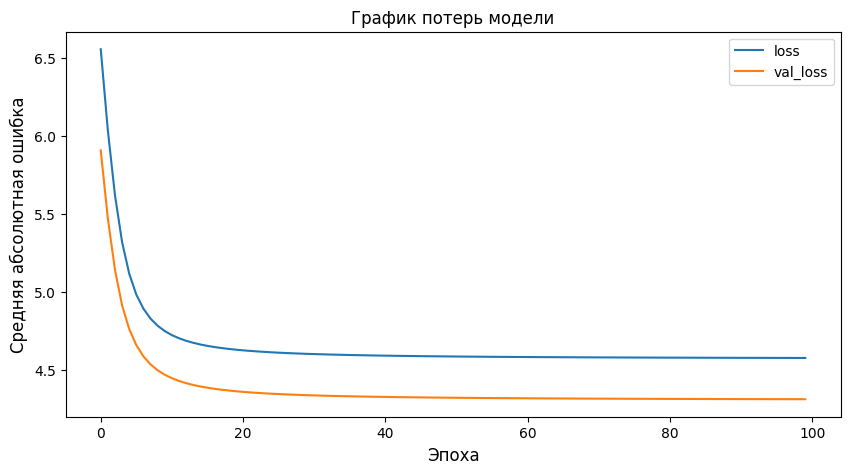

In [212]:
model_loss_plot(history)

10/10 [==============================] - 0s 3ms/step


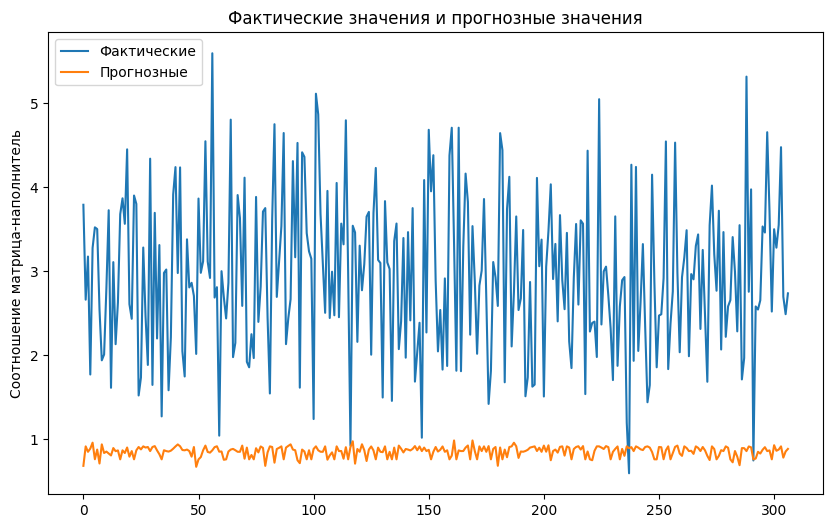

In [213]:
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Фактические')
plt.plot(y_pred, label='Прогнозные')
plt.ylabel('Соотношение матрица-наполнитель')
plt.title('Фактические значения и прогнозные значения')
plt.legend()
plt.show()

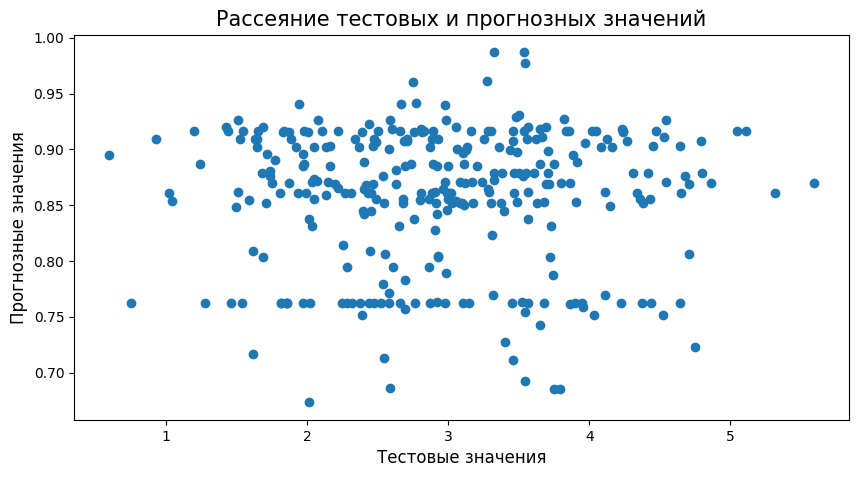

In [215]:
actual_and_predicted_scatter(y_test.values, y_pred)